In [ ]:
%pip install textblob

In [1]:
import nltk
nltk.download('punkt_tab')
nltk.download('brown')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
from textblob import TextBlob

In [5]:
blob = TextBlob("John is learning natural language processing")
for np in blob.noun_phrases:
  print(np)

john
natural language processing


In [9]:
blob = TextBlob("Donald Trump is the 45th president of the United States")
for np in blob.noun_phrases:
  print(np)

donald trump
45th president


### 2. Tính độ tương quan giữa 2 văn bản

In [10]:
documents = (
"I like NLP",
"I am exploring NLP",
"I am a beginner in NLP",
"I want to learn NLP",
"I like advanced NLP"
)

In [11]:
#Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
#Compute tfidf : feature engineering
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape

(5, 10)

In [16]:
import pandas as pd

df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df.head()


,advanced,am,beginner,exploring,in,learn,like,nlp,to,want
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.861037,0.508542,0.000000,0.000000
1,0.000000,0.588732,0.000000,0.729718,0.000000,0.000000,0.000000,0.347715,0.000000,0.000000
2,0.000000,0.475575,0.589463,0.000000,0.589463,0.000000,0.000000,0.280882,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.556669,0.000000,0.265256,0.556669,0.556669
4,0.729718,0.000000,0.000000,0.000000,0.000000,0.000000,0.588732,0.347715,0.000000,0.000000


In [18]:
tfidf_matrix[0:1].toarray() # first document vector

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.861037  , 0.50854232, 0.        , 0.        ]])

In [19]:
#compute similarity for first sentence with rest of the sentences
cosine_similarity(tfidf_matrix[0:1],tfidf_matrix)

array([[1.        , 0.17682765, 0.14284054, 0.13489366, 0.68374784]])

### 3. Đối sánh ngữ âm

### 4. Fuzzy Search
- Tìm kiếm gần đúng (Fuzzy Search) là một kỹ thuật tìm kiếm cho phép tìm kiếm các từ hoặc cụm từ gần giống với từ hoặc cụm từ đã cho, ngay cả khi có sự khác biệt nhỏ về chính tả hoặc ngữ nghĩa.

In [2]:
%pip install thefuzz

  Using cached thefuzz-0.22.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached rapidfuzz-3.12.2-cp312-cp312-win_amd64.whl.metadata (12 kB)
Using cached thefuzz-0.22.1-py3-none-any.whl (8.2 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from thefuzz import fuzz

In [4]:
s1 = "I Love You"
s2 = "I Love You"
fuzz.partial_ratio(s1,s2)

100

In [5]:
s1 = "I Love You"
s2 = "I Love You Too"
fuzz.partial_ratio(s1,s2)

100

In [12]:
s1 = "I Love You"
s2 = "I lovee you"
fuzz.partial_ratio(s1,s2)

70

### 5. POS tagging

In [16]:
Text = "I love NLP and I will learn NLP in 1 month"

In [24]:
# Importing necessary packages and stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


In [25]:
# Tokenize the text
tokens = sent_tokenize(Text)

In [26]:
#Generate tagging for all the tokens using loop
nltk.download('averaged_perceptron_tagger')
for i in tokens:
  words = nltk.word_tokenize(i)
  words = [w for w in words if not w in stop_words]
  # POS-tagger.
  tags = nltk.pos_tag(words)
tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('love', 'VBP'),
 ('NLP', 'NNP'),
 ('I', 'PRP'),
 ('learn', 'VBP'),
 ('NLP', 'RB'),
 ('1', 'CD'),
 ('month', 'NN')]

### 6. Trích xuất thực thể (nltk)

In [30]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [32]:
%pip install svgling

Note: you may need to restart the kernel to use updated packages.


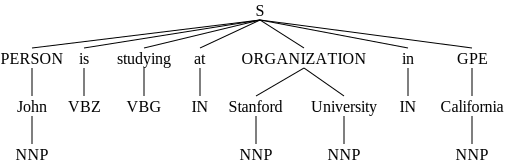

In [33]:
from nltk import ne_chunk, pos_tag, word_tokenize
sent = "John is studying at Stanford University in California"
ne_chunk(pos_tag(word_tokenize(sent)), binary=False)

# Các thực thể của câu trên là: John, Stanford University, California

# NNP: Noun Phrase
# VBG: Verb, gerund or present participle
# IN: Preposition or subordinating conjunction

### 7. Trích xuất thực thể (spacy)

In [ ]:
%pip install spacy

In [5]:
# python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (581980377.py, line 1)

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')

In [7]:
for e in doc.ents:
  print(e.text, e.start_char,e.end_char, e.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE
